In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Bidirectional,Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


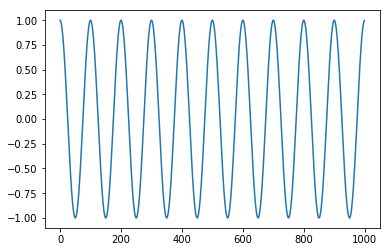

In [36]:
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plt.plot(dataset)
plt.show()

In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [38]:
look_back = 20

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [17]:
batch_size = 1
model = Sequential()
model.add(LSTM(32, input_shape=trainX[0].shape))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs = 10, batch_size = batch_size, verbose = 2)

Epoch 1/10
8s - loss: 0.0457
Epoch 2/10
7s - loss: 0.0097
Epoch 3/10
7s - loss: 0.0093
Epoch 4/10
7s - loss: 0.0100
Epoch 5/10
8s - loss: 0.0091
Epoch 6/10
8s - loss: 0.0092
Epoch 7/10
8s - loss: 0.0087
Epoch 8/10
8s - loss: 0.0087
Epoch 9/10
8s - loss: 0.0085
Epoch 10/10
8s - loss: 0.0084


In [39]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.0379334062323
Test Score:  0.0413530259279


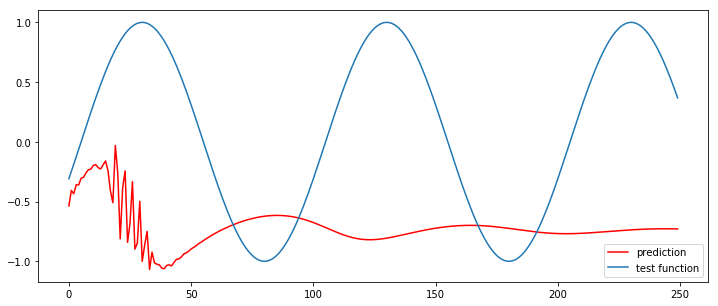

In [40]:


look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))



plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()



In [41]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [67]:
batch_size = 1
model = Sequential()
model.add(Bidirectional(LSTM(32, return_sequences=True, stateful = True),batch_input_shape=(batch_size, look_back, 1)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32, stateful = True),batch_input_shape = (batch_size,look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
for i in range(50):
    print(i)
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_23 (Bidirectio (1, 20, 64)               8704      
_________________________________________________________________
dropout_17 (Dropout)         (1, 20, 64)               0         
_________________________________________________________________
bidirectional_24 (Bidirectio (1, 64)                   24832     
_________________________________________________________________
dense_24 (Dense)             (1, 1)                    65        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________
None
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [68]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.176576795529
Test Score:  0.178307104247


In [69]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

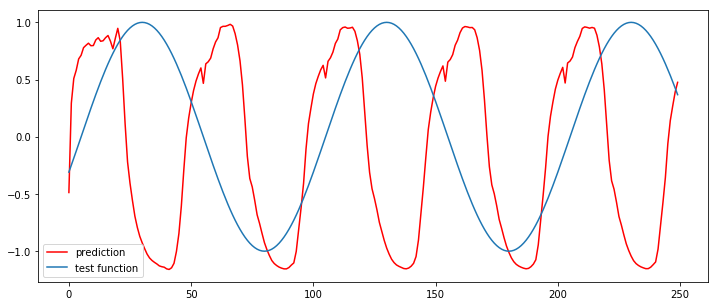

In [70]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

In [29]:
from keras.models import Sequential, Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.optimizers import Adagrad

first_input = Input(shape=(2, ))
first_dense = Dense(1, )(first_input)

second_input = Input(shape=(2, ))
second_dense = Dense(1, )(second_input)

merge_one = concatenate([first_dense, second_dense])

third_input = Input(shape=(1, ))
merge_two = concatenate([merge_one, third_input])

model = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
model.compile(optimizer='Adagrad', loss='binary_crossentropy',
               metrics=['accuracy'])

In [31]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 2)             0                                            
____________________________________________________________________________________________________
input_8 (InputLayer)             (None, 2)             0                                            
____________________________________________________________________________________________________
dense_11 (Dense)                 (None, 1)             3                                            
____________________________________________________________________________________________________
dense_12 (Dense)                 (None, 1)             3                                            
___________________________________________________________________________________________

In [96]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras import backend
model = Sequential()
model.add(Embedding(100,128, input_length = 80))
model.add(Dense(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 80, 128)           12800     
_________________________________________________________________
dense_27 (Dense)             (None, 80, 32)            4128      
Total params: 16,928
Trainable params: 16,928
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.models import Sequential, Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate,Embedding,Bidirectional,LSTM
from keras.optimizers import Adagrad

first_input = Input(shape=(2, ))
first_embed = Embedding(1,2)(first_input)
first_lstm = Bidirectional(LSTM(32))(first_embed)

first1_input = Input(shape=(2, ))
first1_embed = Embedding(1,2)(first1_input)
first1_lstm = Bidirectional(LSTM(32))(first1_embed)

model_one = concatenate([first_lstm,first1_lstm])
model = Model(inputs=[first_input, first1_input], outputs=model_one)
model.compile(optimizer='Adagrad', loss='binary_crossentropy',
               metrics=['accuracy'])

In [42]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 2)             0                                            
____________________________________________________________________________________________________
input_8 (InputLayer)             (None, 2)             0                                            
____________________________________________________________________________________________________
embedding_7 (Embedding)          (None, 2, 2)          2                                            
____________________________________________________________________________________________________
embedding_8 (Embedding)          (None, 2, 2)          2                                            
___________________________________________________________________________________________